<h1>Trabajo</h1>
<!----Hey hey!!!---->

<h2>Asignatura: Estadistica 2</h2>

<h3>Profesor: Carlos Alfonso Mantilla Duarte
<br>
Grupo: F1</h3>

<h4>Andrés Felipe Uribe García - 2160793
<br>Julián Orlando Rodríguez Villamizar - 2170137
<br>Isabel Cristina Gómez Balvin - 2171895 </h4>

<br>El estudiante debe descargar el archivo del siguiente enlace y realizar el respectivo análisis haciendo uso de los modelos lineales: https://www.dropbox.com/s/vv0f1k2y5nalpgx/bank-additional-full.csv?dl=0
<br>
<br>Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario) estaba ("sí") o no ("no") suscrito.
<br>
<br>Las variables registradas son las siguientes:
<br>
<br>age - edad
<br>job- tipo de trabajo
<br>marital - estado civil
<br>education - nivel educativo
<br>default - crédito en incumplimiento
<br>housing - crédito de vivienda
<br>loan - préstamos personal
<br>contact - tipo de contacto realizado
<br>month - mes en que se hizo el último contacto
<br>day_of_week - último día de contacto de la semana
<br>duration - duración del último contacto, en segundos
<br>campaign - número de contactos realizados durante esta campaña y para este cliente
<br>pdays - número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (999 significa que el cliente no fue contactado previamente)
<br>previous- número de contactos realizados antes de esta campaña y para este cliente
<br>poutcome - resultado de la campaña de marketing anterior
<br>emp.var.rate- tasa de variación del empleo - indicador trimestral
<br>cons.price.idx - índice de precios al consumidor - indicador mensual
<br>cons.conf.idx - índice de confianza del consumidor - indicador mensual
<br>euribor3m - euribor tasa de 3 meses - indicador diario
<br>nr.employed - número de empleados
<br>y - ¿el cliente ha suscrito un depósito a plazo?
<br>
<br>Los datos fueron tomados de: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS
</pr>

In [1]:
install.packages('samplingbook')
library(samplingbook)
library('SamplingUtil')
library(dplyr)
library(magrittr)
install.packages("bbmle")
library(bbmle)
install.packages("stats4")
library(stats4)
install.packages('rafalib')
library(rafalib)
library("readr")
ls() 

Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'samplingbook' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpA7O01P\downloaded_packages


Warning message:
"package 'samplingbook' was built under R version 4.0.2"
Loading required package: pps

Loading required package: sampling

Loading required package: survey

Loading required package: grid

Loading required package: Matrix

Loading required package: survival


Attaching package: 'survival'


The following objects are masked from 'package:sampling':

    cluster, strata



Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'bbmle' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpA7O01P\downloaded_packages


Warning message:
"package 'bbmle' was built under R version 4.0.2"
Loading required package: stats4


Attaching package: 'bbmle'


The following object is masked from 'package:dplyr':

    slice


Warning message:
"package 'stats4' is in use and will not be installed"
Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'rafalib' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpA7O01P\downloaded_packages


character(0)

In [2]:
dataset <- read.csv("bank-additional-full.csv", header=TRUE,sep=";" )

In [3]:
#Rellenamos los espacios faltantes con su media correspondiente
#pues de omitirlos podriamos perder informacion importante
R<-data.frame(#Variables continuas
                Edad=dataset$age,
                Camp=dataset$campaign,
                NDias=dataset$pdays,
                TVE=dataset$emp.var.rate,
                IPC=dataset$cons.price.idx,
                ICC=dataset$cons.conf.idx,
                Eu=dataset$euribor3m,
                NE=dataset$nr.employed,
                Dur=dataset$duration,
    
              #Variables No Continuas
                Trab=dataset$job,
                EstCv=dataset$marital,
                NvEduc=dataset$education,
                CredInc=dataset$default,
                CredViv=dataset$housing,
                CredPer=dataset$loan,
                Cont=dataset$contact,
                Mes=dataset$month,
                Dia=dataset$day_of_week,
                NPrev=dataset$previous,
                RPrev=dataset$poutcome,
                Sus=dataset$y)


In [4]:
head(R)
tail(R)

,Edad,Camp,NDias,TVE,IPC,ICC,Eu,NE,Dur,Trab,...,NvEduc,CredInc,CredViv,CredPer,Cont,Mes,Dia,NPrev,RPrev,Sus
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,56,1,999,1.1,93.994,-36.4,4.857,5191,261,housemaid,...,basic.4y,no,no,no,telephone,may,mon,0,nonexistent,no
2,57,1,999,1.1,93.994,-36.4,4.857,5191,149,services,...,high.school,unknown,no,no,telephone,may,mon,0,nonexistent,no
3,37,1,999,1.1,93.994,-36.4,4.857,5191,226,services,...,high.school,no,yes,no,telephone,may,mon,0,nonexistent,no
4,40,1,999,1.1,93.994,-36.4,4.857,5191,151,admin.,...,basic.6y,no,no,no,telephone,may,mon,0,nonexistent,no
5,56,1,999,1.1,93.994,-36.4,4.857,5191,307,services,...,high.school,no,no,yes,telephone,may,mon,0,nonexistent,no
6,45,1,999,1.1,93.994,-36.4,4.857,5191,198,services,...,basic.9y,unknown,no,no,telephone,may,mon,0,nonexistent,no


,Edad,Camp,NDias,TVE,IPC,ICC,Eu,NE,Dur,Trab,...,NvEduc,CredInc,CredViv,CredPer,Cont,Mes,Dia,NPrev,RPrev,Sus
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
41183,29,1,9,-1.1,94.767,-50.8,1.028,4963.6,112,unemployed,...,basic.4y,no,yes,no,cellular,nov,fri,1,success,no
41184,73,1,999,-1.1,94.767,-50.8,1.028,4963.6,334,retired,...,professional.course,no,yes,no,cellular,nov,fri,0,nonexistent,yes
41185,46,1,999,-1.1,94.767,-50.8,1.028,4963.6,383,blue-collar,...,professional.course,no,no,no,cellular,nov,fri,0,nonexistent,no
41186,56,2,999,-1.1,94.767,-50.8,1.028,4963.6,189,retired,...,university.degree,no,yes,no,cellular,nov,fri,0,nonexistent,no
41187,44,1,999,-1.1,94.767,-50.8,1.028,4963.6,442,technician,...,professional.course,no,no,no,cellular,nov,fri,0,nonexistent,yes
41188,74,3,999,-1.1,94.767,-50.8,1.028,4963.6,239,retired,...,professional.course,no,yes,no,cellular,nov,fri,1,failure,no


,Edad,Camp,NDias,TVE,IPC,ICC,Eu,NE,Dur
Edad,1.0000000000,0.00459358,-0.03436895,-0.0003706855,0.000856715,0.129371614,0.01076743,-0.01772513,-0.000865705
Camp,0.0045935805,1.00000000,0.05258357,0.1507538056,0.127835912,-0.013733099,0.13513251,0.14409489,-0.071699226
NDias,-0.0343689512,0.05258357,1.00000000,0.2710041743,0.078889109,-0.091342354,0.29689911,0.37260474,-0.047577015
TVE,-0.0003706855,0.15075381,0.27100417,1.0000000000,0.775334171,0.196041268,0.97224467,0.90697010,-0.027967884
IPC,0.0008567150,0.12783591,0.07888911,0.7753341708,1.000000000,0.058986182,0.68823011,0.52203398,0.005312268
ICC,0.1293716142,-0.01373310,-0.09134235,0.1960412681,0.058986182,1.000000000,0.27768622,0.10051343,-0.008172873
Eu,0.0107674295,0.13513251,0.29689911,0.9722446712,0.688230107,0.277686220,1.00000000,0.94515443,-0.032896656
NE,-0.0177251319,0.14409489,0.37260474,0.9069701013,0.522033977,0.100513432,0.94515443,1.00000000,-0.044703223
Dur,-0.0008657050,-0.07169923,-0.04757702,-0.0279678845,0.005312268,-0.008172873,-0.03289666,-0.04470322,1.000000000


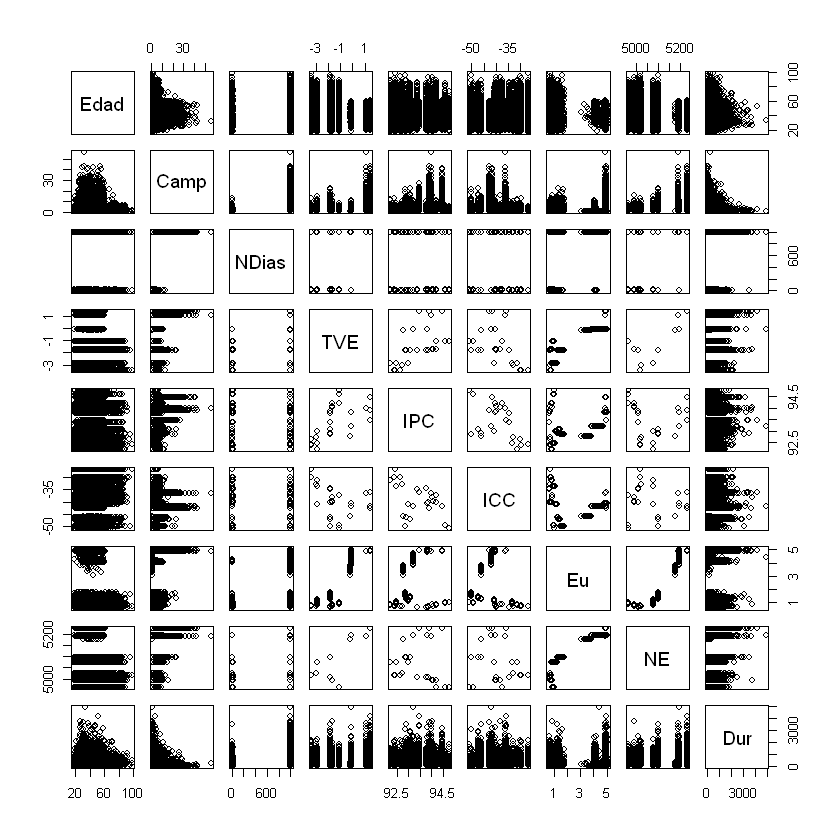

In [5]:
# Hagamos una rápida inspección gráfica. Primero, sólo con las variables continuas
plot(R[,1:9])
# Calculamos, ahora el coeficiente de correlación simple:
cor(R[,1:9])

In [6]:
summary(R)

      Edad            Camp            NDias            TVE          
 Min.   :17.00   Min.   : 1.000   Min.   :  0.0   Min.   :-3.40000  
 1st Qu.:32.00   1st Qu.: 1.000   1st Qu.:999.0   1st Qu.:-1.80000  
 Median :38.00   Median : 2.000   Median :999.0   Median : 1.10000  
 Mean   :40.02   Mean   : 2.568   Mean   :962.5   Mean   : 0.08189  
 3rd Qu.:47.00   3rd Qu.: 3.000   3rd Qu.:999.0   3rd Qu.: 1.40000  
 Max.   :98.00   Max.   :56.000   Max.   :999.0   Max.   : 1.40000  
      IPC             ICC              Eu              NE      
 Min.   :92.20   Min.   :-50.8   Min.   :0.634   Min.   :4964  
 1st Qu.:93.08   1st Qu.:-42.7   1st Qu.:1.344   1st Qu.:5099  
 Median :93.75   Median :-41.8   Median :4.857   Median :5191  
 Mean   :93.58   Mean   :-40.5   Mean   :3.621   Mean   :5167  
 3rd Qu.:93.99   3rd Qu.:-36.4   3rd Qu.:4.961   3rd Qu.:5228  
 Max.   :94.77   Max.   :-26.9   Max.   :5.045   Max.   :5228  
      Dur             Trab              EstCv              NvEduc    

In [7]:
# el contraste de hipótesis se hace con la función cor.test:
with(R, cor.test(Edad,Dur))
with(R, cor.test(Dur,Camp))
with(R, cor.test(Camp,Edad))


	Pearson's product-moment correlation

data:  Edad and Dur
t = -0.17569, df = 41186, p-value = 0.8605
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.010523125  0.008791876
sample estimates:
         cor 
-0.000865705 



	Pearson's product-moment correlation

data:  Dur and Camp
t = -14.588, df = 41186, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.08130044 -0.06208471
sample estimates:
        cor 
-0.07169923 



	Pearson's product-moment correlation

data:  Camp and Edad
t = 0.93225, df = 41186, p-value = 0.3512
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.005064152  0.014250456
sample estimates:
       cor 
0.00459358 


In [8]:
#Funcion para calcular el Coeficiente de correlacion multiple.
rho.mult<-function(datos)
# datos: matriz con las variables del problema.
# La primera columna debe ser la variable respuesta.
# Las restantes p-1 columnas son las variables explicativas.
{
matriz<-var(datos)
# calculo
n<-nrow(datos)
p<-ncol(matriz)
sxx<-matriz[2:p,2:p]
syx<-matrix(matriz[1,2:p],nrow=1)
sxy<-t(syx)
#coeficiente
rho.mult<-sqrt(syx%*%solve(sxx)%*%sxy)/sqrt(matriz[1,1])
cat("\n Coeficiente de correlacion multiple: ",rho.mult,"\n")
#estadistico
if(abs(rho.mult)==1)
stop("Imposible resolver contraste.
Coeficiente de correlacion multiple igual a 1", call. = FALSE)
else{
est<-((n-(p-1)-1)*rho.mult)/((p-1)*(1-rho.mult^2))
#grafico
par(mfrow=c(1,1))
x<-seq(0,qf(0.999,p-1,n-(p-1)-1),length=500)
plot(x,df(x,p-1,n-(p-1)-1),type="l",ylab="densidad",
main="Contraste Correlacion Multiple")
abline(v=qf(0.975,p-1,n-(p-1)-1),col="red")
abline(v=qf(0.025,p-1,n-(p-1)-1),col="red")
abline(v=est,col="blue")
abline(h=0)
legend(qf(0.98,p-1,n-(p-1)-1),pf((p+3)/(n-p),p-1,n-(p-1)-1),
c("Estadistico","Region Critica"),lty=rep(1,2),
col=c("blue","red"),bty="n")
cat("\n Estadistico de contraste: ",round(est,3),"\n")
cat("\n p-valor: ",round(2*(1-pf(est,p-1,n-(p-1)-1)),3),"\n\n")}
return(invisible())
}


 Coeficiente de correlacion multiple:  0.1353495 

 Estadistico de contraste:  709.696 

 p-valor:  0 



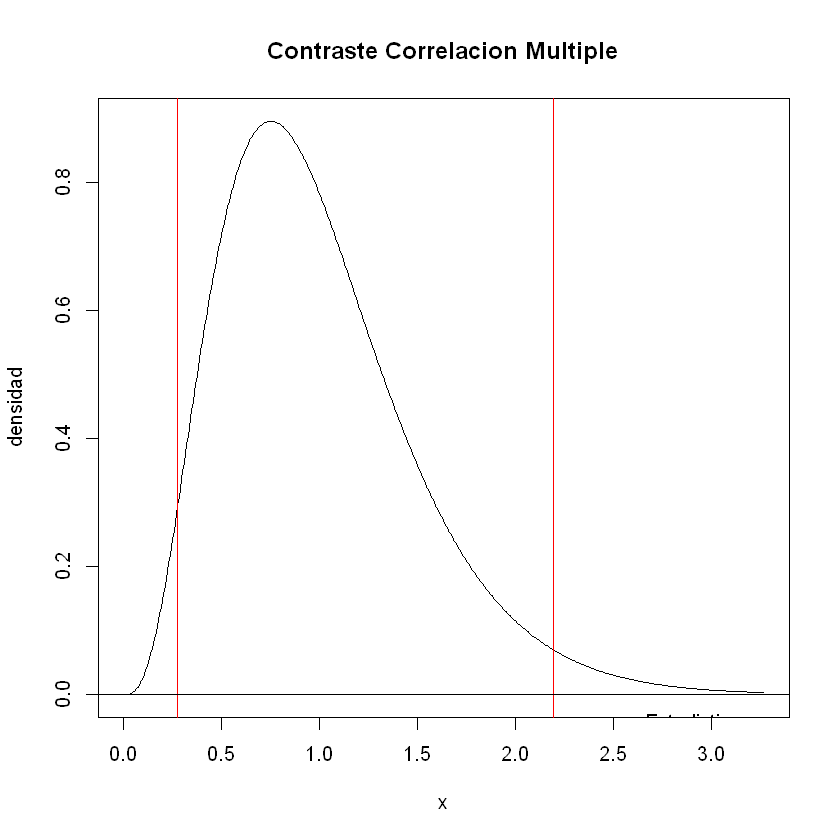

In [9]:
rho.mult(R[,1:9])

In [10]:
install.packages('corrplot')
library(corrplot)
C<-cor(R[,1:9]) #Continuos

Installing package into 'C:/Users/ANDRESURIBE/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ANDRESURIBE\AppData\Local\Temp\RtmpA7O01P\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 4.0.2"
corrplot 0.84 loaded



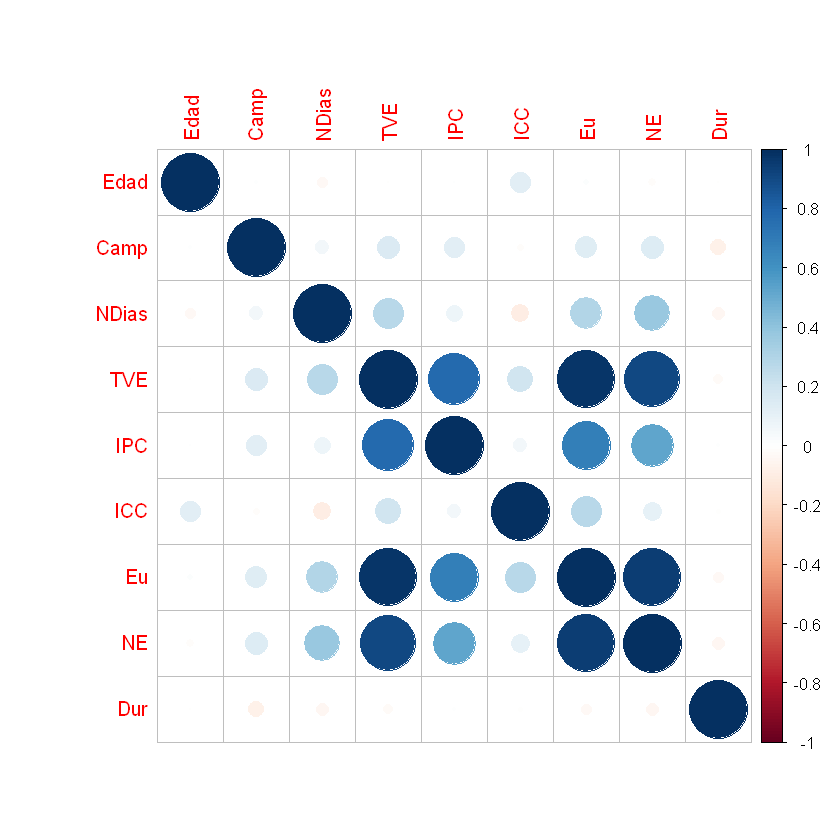

In [13]:
corrplot(C, method="circle")

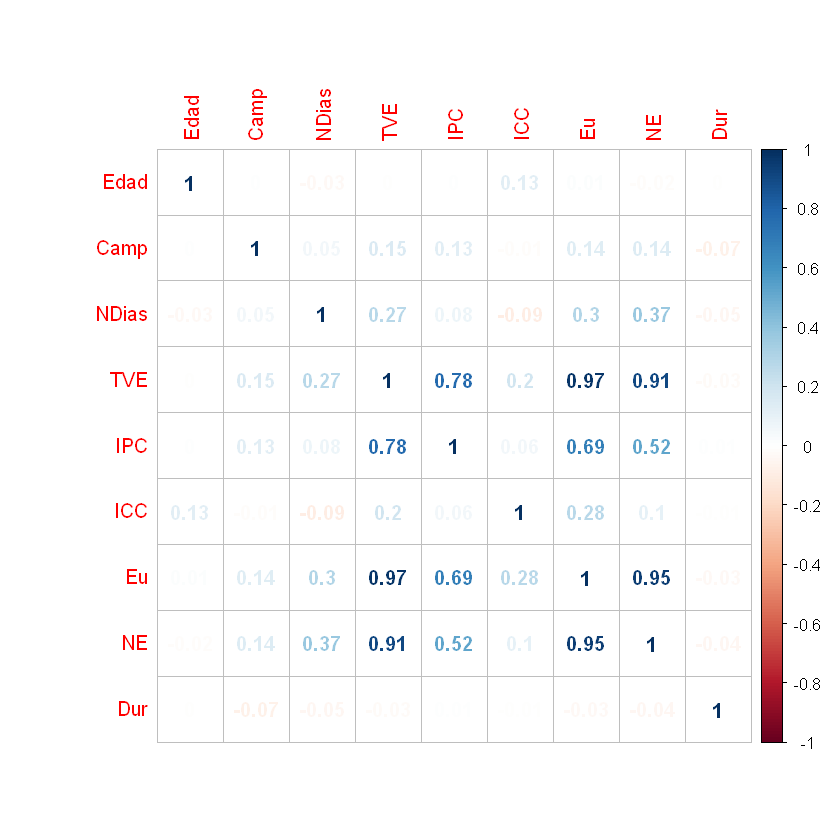

In [14]:
corrplot(C, method="number")